In [1]:
from sklearn.datasets import load_iris
from sklearn import tree
from matplotlib import pyplot as plt

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

In [3]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4,min_samples_leaf=25)
clf.fit(X,y)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=25)

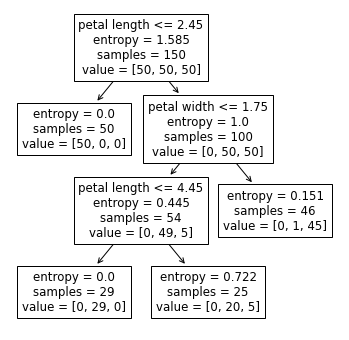

In [4]:
fig, ax = plt.subplots(figsize=(6, 6))
tree.plot_tree(clf,ax=ax,feature_names=['sepal length','sepal width','petal length','petal width'])
plt.show()

In [10]:
import pandas as pd

data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [11]:
from six import StringIO
#from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

from sklearn import tree

In [16]:
df['species']

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: category
Categories (3, object): ['setosa', 'versicolor', 'virginica']

In [25]:
#df['species'].value_counts().index
import numpy

df_cat_arr = numpy.array(pd.Categorical(df['species']).categories)
df_cat_arr

array(['setosa', 'versicolor', 'virginica'], dtype=object)

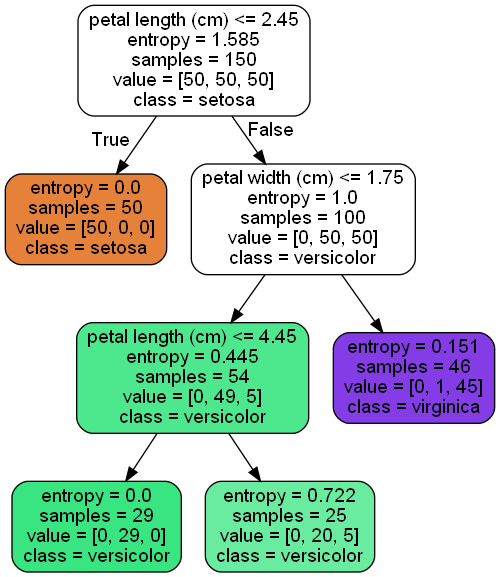

In [30]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,   filled=True, rounded=True,  feature_names=data.feature_names, class_names =df_cat_arr  )
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())